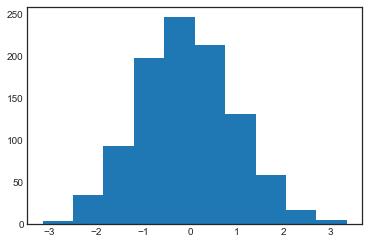

In [1]:
# 4.7　频次直方图、数据区间划分和分布密度
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data= np.random.randn(1000)
plt.hist(data);

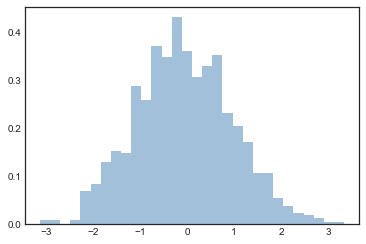

In [3]:
plt.hist(data, bins=30, normed=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

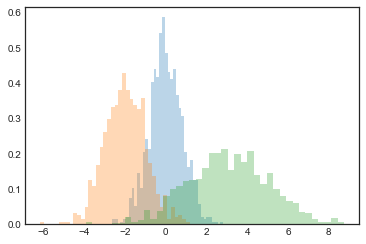

In [4]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)
kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

In [5]:
# 简单地计算频次直方图（就是计算每段区间的样本数）
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 39 291 459 189  22]


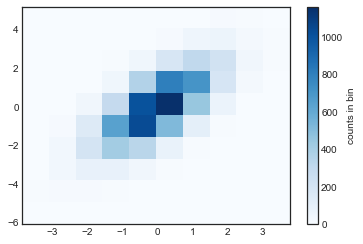

In [6]:
mean = [0, 0]
cov  = [[1, 1], [1, 2]]
X, y = np.random.multivariate_normal(mean, cov, 10000).T
plt.hist2d(X, y, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

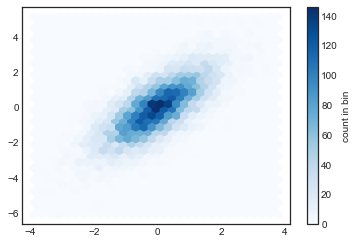

In [8]:
# 2. plt.hexbin：六边形区间划分
plt.hexbin(X, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

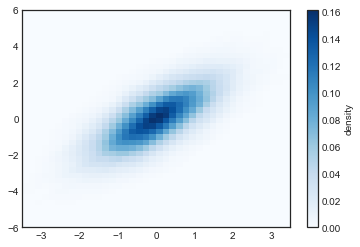

In [10]:
# 3: 核密度估计
from scipy.stats import gaussian_kde

# 拟合数组维度[Ndim, Nsamples]
data = np.vstack([X, y])
kde = gaussian_kde(data)

# 用一对规则的网络数据拟合
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# 画出结果图
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label('density')

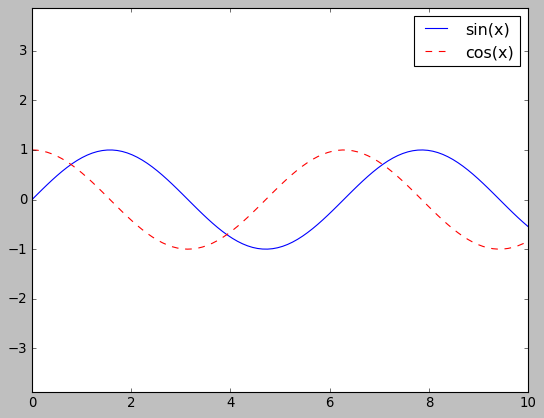

In [15]:
# 4.8: 配置图例
import matplotlib.pyplot as plt
plt.style.use('classic')
x = np.linspace(0, 10, 100)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='sin(x)')
ax.plot(x, np.cos(x), '--r', label='cos(x)')
ax.axis('equal')
leg = ax.legend();

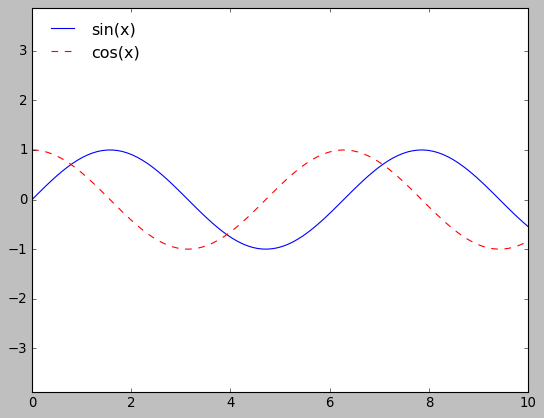

In [16]:
ax.legend(loc='upper left', frameon=False)
fig

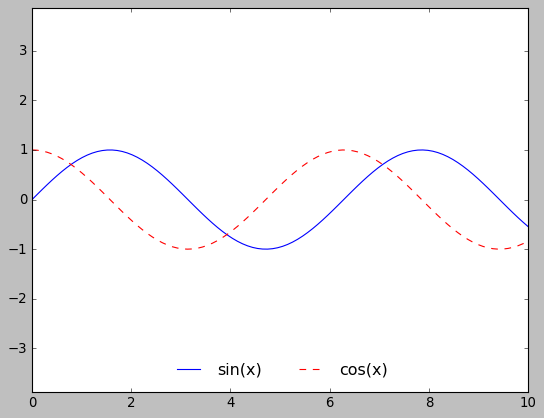

In [17]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

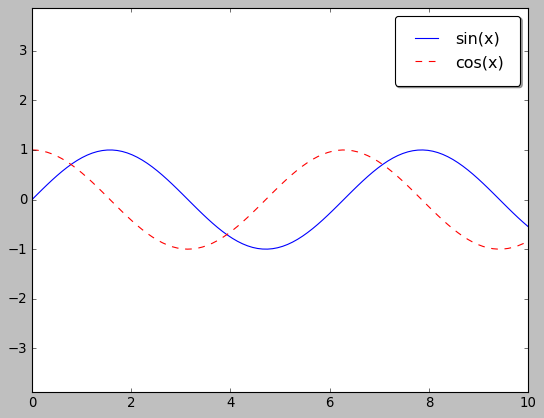

In [18]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

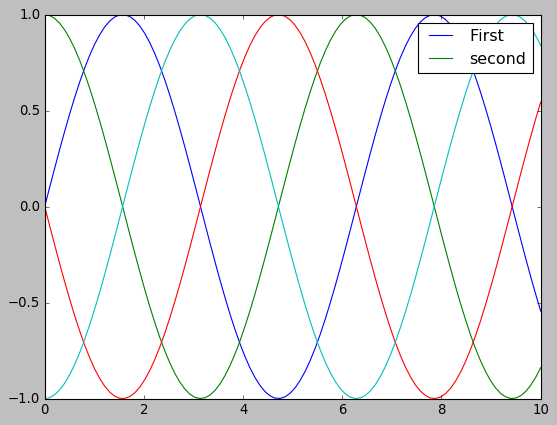

In [21]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)
plt.legend(lines[:2], ['First', 'second']);

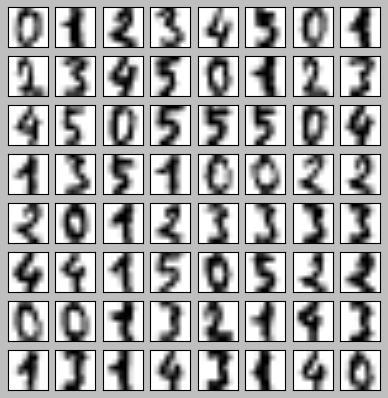

In [23]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

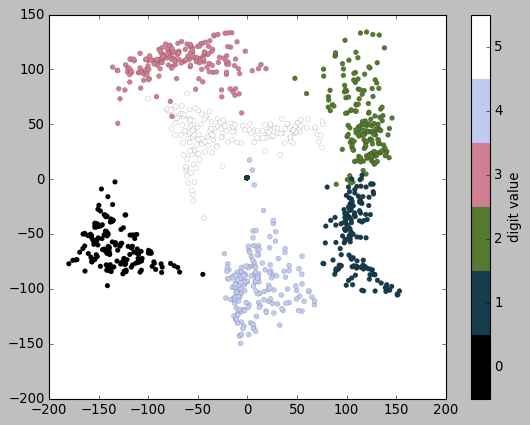

In [25]:
# 使用IsoMap方法将数字投影到二维空间
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

# 画图
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

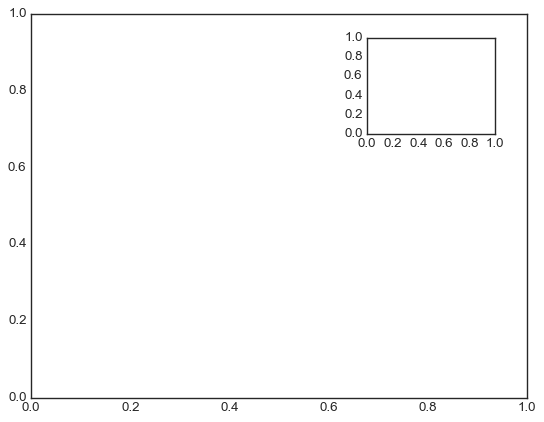

In [29]:
# 4.10: 多子图
plt.style.use('seaborn-white')
ax1 = plt.axes()
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

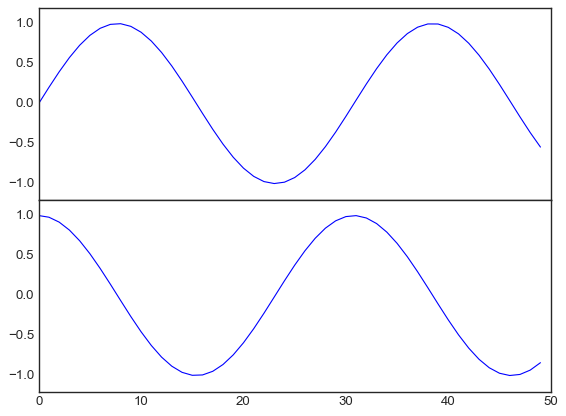

In [31]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.5,0.8,0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1,0.1,0.8,0.4],
                   ylim=(-1.2, 1.2))
x = np.linspace(0,10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

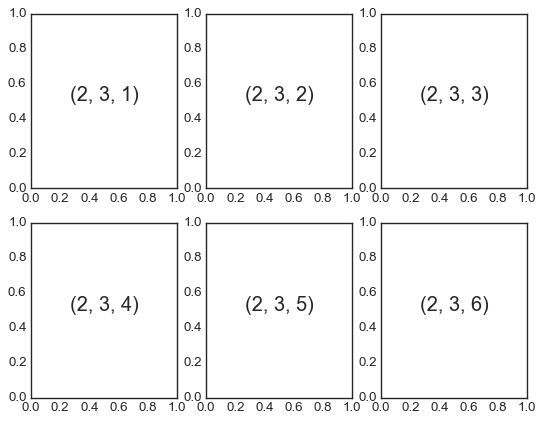

In [33]:
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.text(0.5,0.5,str((2,3,i)),fontsize=18, ha='center')

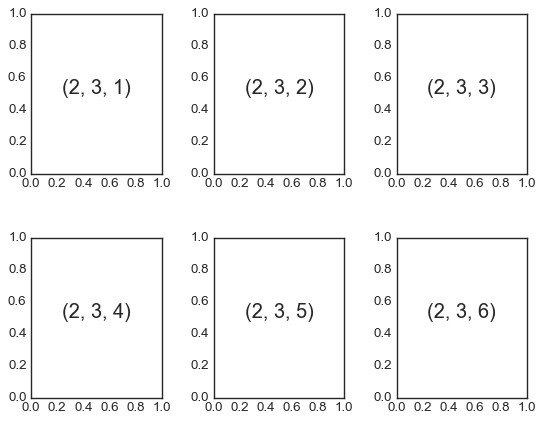

In [34]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,7):
    ax = fig.add_subplot(2,3,i)
    plt.text(0.5,0.5,str((2,3,i)),fontsize=18, ha='center')

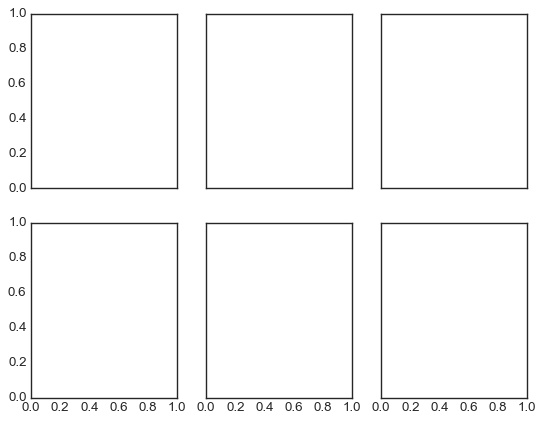

In [35]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

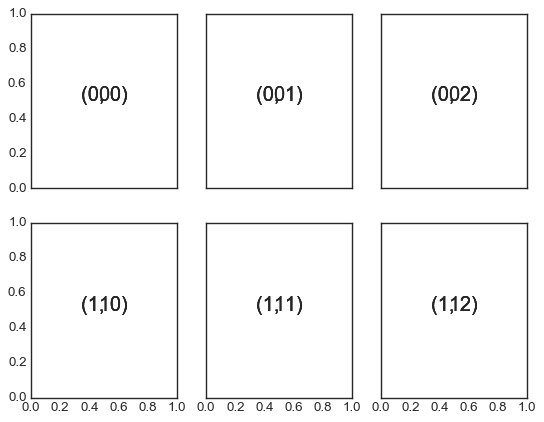

In [41]:
for i in range(2): 
    for j in range(3): 
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize=18, ha='center')
fig

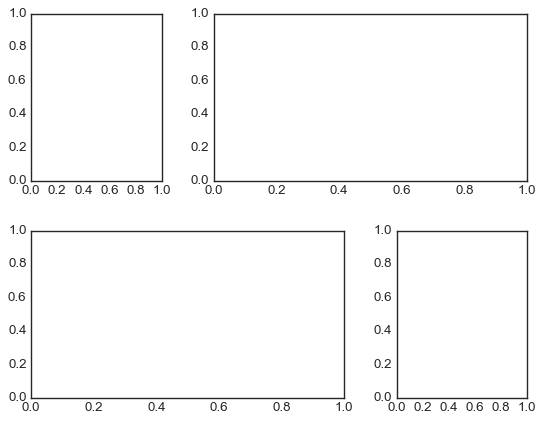

In [42]:
grid = plt.GridSpec(2,3,wspace=0.4, hspace=0.3)
plt.subplot(grid[0,0])
plt.subplot(grid[0,1:])
plt.subplot(grid[1,:2])
plt.subplot(grid[1,2]);

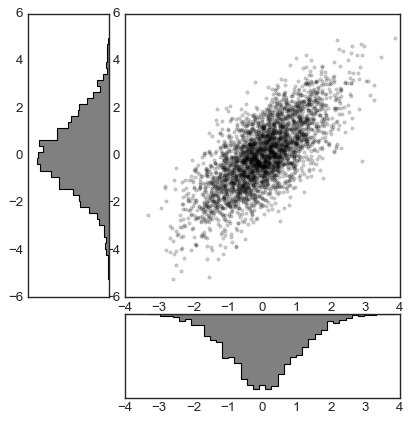

In [47]:
mean = [0,0]
cov = [[1,1],[1,2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# 设置坐标轴和网格配置方式
fig = plt.figure(figsize=(6,6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# 主坐标轴画散点图
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# 次坐标轴画频次直方图
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

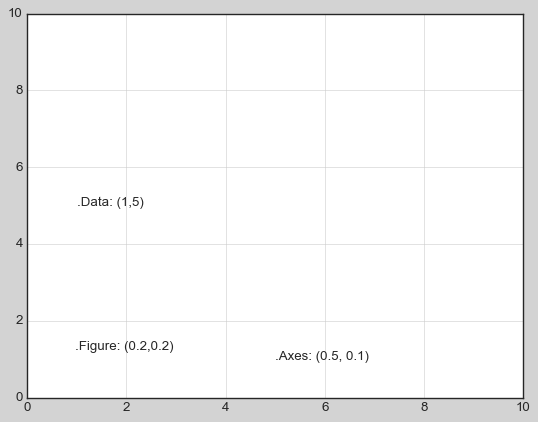

In [53]:
fig, ax = plt.subplots(facecolor='lightgray')
plt.grid()
ax.axis([0,10,0,10])
ax.text(1, 5, ".Data: (1,5)", transform=ax.transData)
ax.text(0.5,0.1,".Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2,0.2, ".Figure: (0.2,0.2)", transform=fig.transFigure);

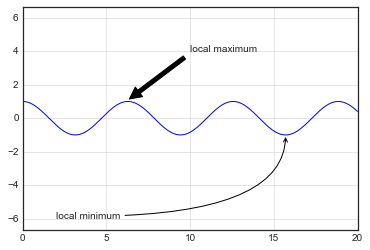

In [60]:
# 4.11.3　箭头与注释
%matplotlib inline
fig, ax = plt.subplots()
plt.grid()
x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')
ax.annotate('local maximum', xy=(6.18,1), xytext=(10,4),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2,-6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

In [61]:
# 4.12.1　主要刻度与次要刻度
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid') 
import numpy as np

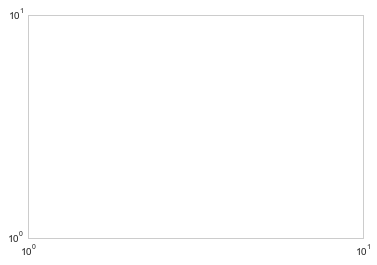

In [63]:
ax = plt.axes(xscale='log', yscale='log')
plt.grid()

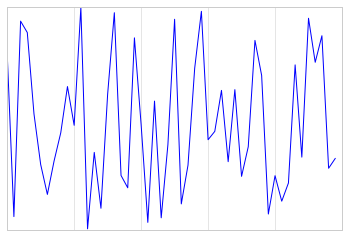

In [66]:
ax = plt.axes()
ax.plot(np.random.rand(50))
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

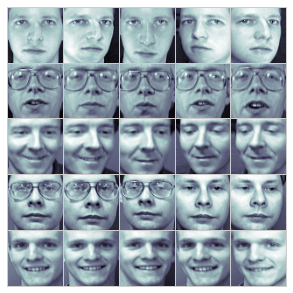

In [69]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap='bone')

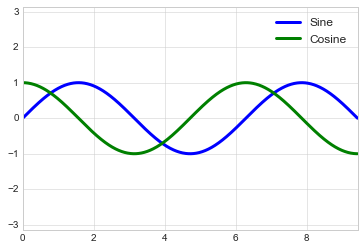

In [73]:
# 画正弦曲线和余弦曲线
fig, ax = plt.subplots() 
x = np.linspace(0, 3 * np.pi, 1000) 
ax.plot(x, np.sin(x), lw=3, label='Sine') 
ax.plot(x, np.cos(x), lw=3, label='Cosine') 
# 设置网格、图例和坐标轴上下限
ax.grid(True) 
ax.legend(frameon=False) 
ax.axis('equal') 
ax.set_xlim(0, 3 * np.pi);

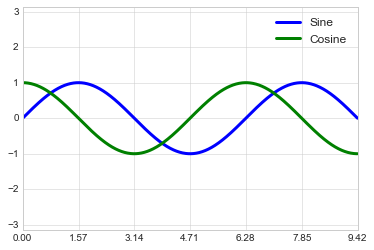

In [74]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2)) 
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4)) 
fig

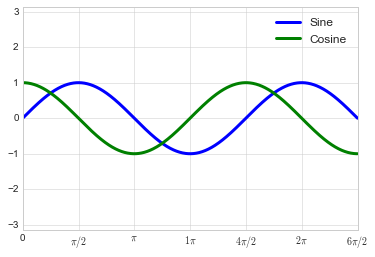

In [75]:
def format_func(value, tick_number):
    # 找到π/2的倍数刻度
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0";
    elif N == 1:
        return r"$\pi/2$";
    elif N == 2:
        return r"$\pi$";
    elif N % 2 == 0:
        return r"${0}\pi/2$".format(N);
    else:
        return r"${0}\pi$".format(N // 2);
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

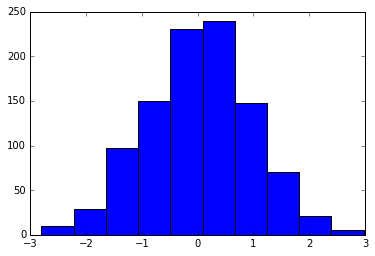

In [77]:
# 4.13 Matplotlib自定义：配置文件与样式表
import matplotlib.pyplot as plt 
plt.style.use('classic') 
import numpy as np 
%matplotlib inline
x = np.random.randn(1000)
plt.hist(x);

D:\Program Files (x86)\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


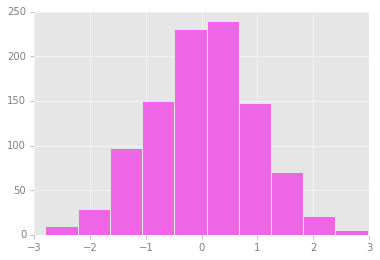

In [81]:
# 用灰色背景
ax = plt.axes(axisbg='#E6E6E6')
ax.set_axisbelow(True)

# 画上白色的网格线
plt.grid(color='w', linestyle='solid')

# 隐藏坐标轴的线条
for spine in ax.spines.values():
    spine.set_visible(False)

# 隐藏上边与右边的刻度
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# 弱化刻度与标签
ax.tick_params(color='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
ax.hist(x, edgecolor='#E6E6E6', color='#EE66E6');